# 東京都新型コロナウイルス感染症のデータ分析

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

In [2]:
url = "https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv"
df = pd.read_csv(url)
df.head()

/Users/kagawakeiichiro/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,確定_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_接触歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,NaN,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,NaN,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,NaN,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,NaN,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,NaN,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
# 最新データの確認
df.tail()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,確定_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_接触歴の有無フラグ,備考,退院済フラグ
282089,281206,130001,東京都,NaN,2021-08-16,NaN,NaN,NaN,40代,女性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282090,281207,130001,東京都,NaN,2021-08-16,NaN,NaN,NaN,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282091,281208,130001,東京都,NaN,2021-08-16,NaN,NaN,NaN,10代,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282092,281209,130001,東京都,NaN,2021-08-16,NaN,NaN,NaN,50代,女性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282093,281210,130001,東京都,NaN,2021-08-16,NaN,NaN,NaN,10代,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,No,全国地方公共団体コード,市区町村名,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_接触歴の有無フラグ,備考,退院済フラグ
count,2.820940e+05,282094.0,0.0,0.0,0.0,0.0,88400.0,0.0,210879.0
mean,1.436812e+05,130001.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
std,9.567348e+04,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0
min,1.000000e+00,130001.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
25%,7.064725e+04,130001.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
50%,1.411555e+05,130001.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
75%,2.116788e+05,130001.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
max,1.001007e+06,130001.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0


In [18]:
df.columns

Index(['No', '全国地方公共団体コード', '都道府県名', '市区町村名', '公表_年月日', '発症_年月日', '確定_年月日',
       '患者_居住地', '患者_年代', '患者_性別', '患者_職業', '患者_状態', '患者_症状', '患者_渡航歴の有無フラグ',
       '患者_接触歴の有無フラグ', '備考', '退院済フラグ'],
      dtype='object')

# profile reportの作成

In [6]:
import os
from pandas_profiling import ProfileReport

In [7]:
CURRENT_DIR = %pwd
CURRENT_DIR

'/Users/kagawakeiichiro/Documents/GitHub/covid19/tokyo'

In [8]:
%ls

analysis.ipynb  daily-week.py   outputs/        week.ipynb


In [9]:
# フォルダ「outputs」が存在しない場合は作成する
outputs_dir = "./outputs/"
if not os.path.exists(outputs_dir):
    os.mkdir(outputs_dir)

In [10]:
report = ProfileReport(df)
report.to_file(os.path.join(outputs_dir, "ProfileReport.html"))

/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 22320 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 20849 missing from current font.
  font.set_text(s, 0.0, flags=L

# テスト

In [41]:
df.公表_年月日
df[df.公表_年月日=='2021-08-05'].確定_年月日.dropna()

231096    2021-08-04
231097    2021-08-04
231098    2021-08-03
231099    2021-08-03
231100    2021-07-31
             ...    
236133    2021-08-03
236134    2021-08-04
236135    2021-08-04
236136    2021-08-04
236137    2021-08-04
Name: 確定_年月日, Length: 5042, dtype: object

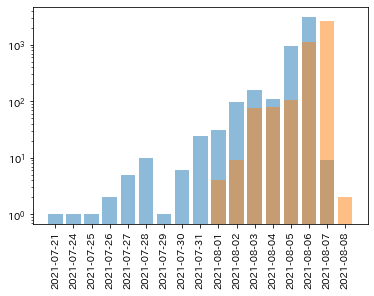

In [74]:
from collections import Counter

for pub_date in ['2021-08-07', '2021-08-08']:
    count = Counter(df[df.公表_年月日==pub_date].確定_年月日.dropna())
    count_sorted = dict(sorted(count.items()))
    # count_sorted
    plt.xticks(rotation=90)     # x軸の文字を90度回転
    plt.yscale('log')
    plt.bar(list(count_sorted.keys()), count_sorted.values(), alpha=0.5)

In [80]:
pub_date = '2021-01-11'
count = Counter(df[df.公表_年月日==pub_date].確定_年月日.dropna())
count_sorted = dict(sorted(count.items()))
count_sorted

{'2020-12-21': 1,
 '2021-01-02': 1,
 '2021-01-05': 3,
 '2021-01-06': 6,
 '2021-01-07': 10,
 '2021-01-08': 72,
 '2021-01-09': 368,
 '2021-01-10': 757,
 '2021-01-11': 34}